In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
#Renaming and Loadinng Dataset
#Displaying first 5 records of the data
#pandas library is used here to load and read ie pd
df=pd.read_csv(r"C:\Users\PC\Downloads\DS\S1\Module II\Principles of DS\CAT I\Real Estate & House Price Trends in Bangladesh\house_price_bd.csv")
df.head()

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3,vacant,1960.0,dhaka,"৳39,000,000","Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1,vacant,1705.0,dhaka,"৳16,900,000","Lake Circus Road, Kalabagan"
2,1370 square feet apartment is ready to sale in...,3.0,3.0,6,vacant,1370.0,dhaka,"৳12,500,000","Shukrabad, Dhanmondi"
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4,vacant,2125.0,dhaka,"৳20,000,000","Block L, Bashundhara R-A"
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4,vacant,2687.0,dhaka,"৳47,500,000","Road No 25, Banani"


In [43]:
df.info

<bound method DataFrame.info of                                                   Title  Bedrooms  Bathrooms  \
0     We Are Offering You A Very Spacious 1960 Sq Ft...       3.0        4.0   
1     Valuable 1705 Square Feet Apartment Is Ready T...       3.0        3.0   
2     1370 square feet apartment is ready to sale in...       3.0        3.0   
3     2125 Square Feet Apartment For Sale In Bashund...       3.0        3.0   
4     Buy This 2687 Square Feet Flat In The Nice Are...       3.0        3.0   
...                                                 ...       ...        ...   
3860  Buy This 1350 Sq Ft Amazing Flat In Gazipur, J...       3.0        3.0   
3861  Properly Designed This 1000 Square Feet Apartm...       2.0        2.0   
3862  1240 Sq Ft Flat For Sale Is Awaiting You In Ga...       3.0        3.0   
3863  An Apartment Of 1300 Sq Ft Is Up For Sale In J...       3.0        3.0   
3864  1350 Sq Ft Residential Apartment For Sale In G...       3.0        3.0   

     Fl

In [44]:
print(df.columns)

Index(['Title', 'Bedrooms', 'Bathrooms', 'Floor_no', 'Occupancy_status',
       'Floor_area', 'City', 'Price_in_taka', 'Location'],
      dtype='object')


In [45]:
df.isnull().sum()

Title                  0
Bedrooms            1001
Bathrooms           1001
Floor_no             690
Occupancy_status      99
Floor_area            99
City                   0
Price_in_taka          0
Location               6
dtype: int64

5. What cleanup was required in your dataset? Determine how to handle the missing values for your dataset.

   For numeric columns like Bedrooms, Bathrooms, and Floor_area,price,size fill with the median.

   For categorical columns like Occupancy_status, 'location' fill with the mode.

   This ensures that essential fields are filled without heavily distorting the data distribution.

In [63]:
df['Bedrooms'].fillna(df['Bedrooms'].median(), inplace=True)
df['Bathrooms'].fillna(df['Bathrooms'].median(), inplace=True)
df['Floor_area'].fillna(df['Floor_area'].median(), inplace=True)
df['Occupancy_status'].fillna(df['Occupancy_status'].mode()[0], inplace=True)
df['Location'].fillna(df['Location'].mode()[0], inplace=True)
df['Floor_no'].fillna(df['Floor_no'].mode()[0], inplace=True)


6. Create a function that accepts the raw data after it has been loaded and returns the cleaned-up data.


In [79]:
# Function to clean data
def clean_data(df):
    # Fill numerical columns with median
    df['Price_in_taka'] = df['Price_in_taka'].fillna(df['Price_in_taka'].median())
    df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].median())
    
    # Fill categorical columns with mode
    if 'location' in df.columns:
        df['location'] = df['location'].fillna(df['location'].mode()[0])
    
    return df

# Apply the function to clean the data
cleaned_df = clean_data(df)
print("Data cleaned and ready for analysis!")



Data cleaned and ready for analysis!


Question 4: Consider who would be interested in your dataset. Identify at least three organizations or individuals that would be interested in your insights. Why?

Real Estate Agencies - They would be interested in understanding the price trends and the types of properties that have higher prices. This helps them advise clients better and set competitive prices.

Government Housing and Urban Development - This organization could use the data to inform housing policy, particularly in terms of affordability and urban planning.

Investment Firms - Investors looking for real estate opportunities would benefit from insights on high-value properties and trends in the Bangladesh housing market.

Bonus - What’s one question you would have asked that is not included, and how would you answer it?
Are certain locations associated with higher property prices in Bangladesh?

In [106]:
df=pd.read_csv(r"C:\Users\PC\Downloads\DS\S1\Module II\Principles of DS\CAT I\Real Estate & House Price Trends in Bangladesh\house_price_bd.csv")

# Split the 'Location' column by ", "
split_locations = df['Location'].str.split(", ").tolist()
print(split_locations)



[['Gulshan 1', 'Gulshan'], ['Lake Circus Road', 'Kalabagan'], ['Shukrabad', 'Dhanmondi'], ['Block L', 'Bashundhara R-A'], ['Road No 25', 'Banani'], ['Middle Badda', 'Badda'], ['Block B', 'Bashundhara R-A'], ['Block D', 'Bashundhara R-A'], ['Matuail', 'Demra'], ['Block H', 'Aftab Nagar'], ['West Dolairpar', 'Shyampur'], ['West Dolairpar', 'Shyampur'], ['West Dolairpar', 'Shyampur'], ['Block B', 'Bashundhara R-A'], ['Block H', 'Aftab Nagar'], ['Sector 10', 'Uttara'], ['Sector 10', 'Uttara'], ['Sector 6', 'Uttara'], ['Lake Circus Road', 'Kalabagan'], ['Block H', 'Bashundhara R-A'], ['Block J', 'Bashundhara R-A'], ['Gulshan 2', 'Gulshan'], ['Free School Street', 'Kathalbagan'], ['Gulshan 1', 'Gulshan'], ['Baitul Aman Housing Society', 'Adabor'], ['Section 6', 'Mirpur'], ['Sector 4', 'Uttara'], ['Nobodoy Housing Society', 'Mohammadpur'], ['Free School Street', 'Kathalbagan'], ['Pallabi', 'Mirpur'], ['Sector 7', 'Uttara'], ['Block C', 'Niketan'], ['Vashani Goli', 'Shantinagar'], ['Gandaria',

Index(['Title', 'Bedrooms', 'Bathrooms', 'Floor_no', 'Occupancy_status',
       'Floor_area', 'City', 'Price_in_taka', 'Location', 'Main_Location'],
      dtype='object')
                      Location    Main_Location
0           Gulshan 1, Gulshan          Gulshan
1  Lake Circus Road, Kalabagan        Kalabagan
2         Shukrabad, Dhanmondi        Dhanmondi
3     Block L, Bashundhara R-A  Bashundhara R-A
4           Road No 25, Banani           Banani
Average property prices by main location:
Main_Location
Banglamotors                  1.200000e+08
Gulshan                       1.155667e+08
Jalalabad Housing Society     1.149000e+08
Eskaton                       1.007500e+08
Hathazari                     9.000000e+07
                                  ...     
Chandra                       4.112000e+06
Fatulla                       3.750000e+06
29 No. West Madarbari Ward    3.296000e+06
Bangshal                      3.000000e+06
Dumni                         2.748914e+06
Name: Price_

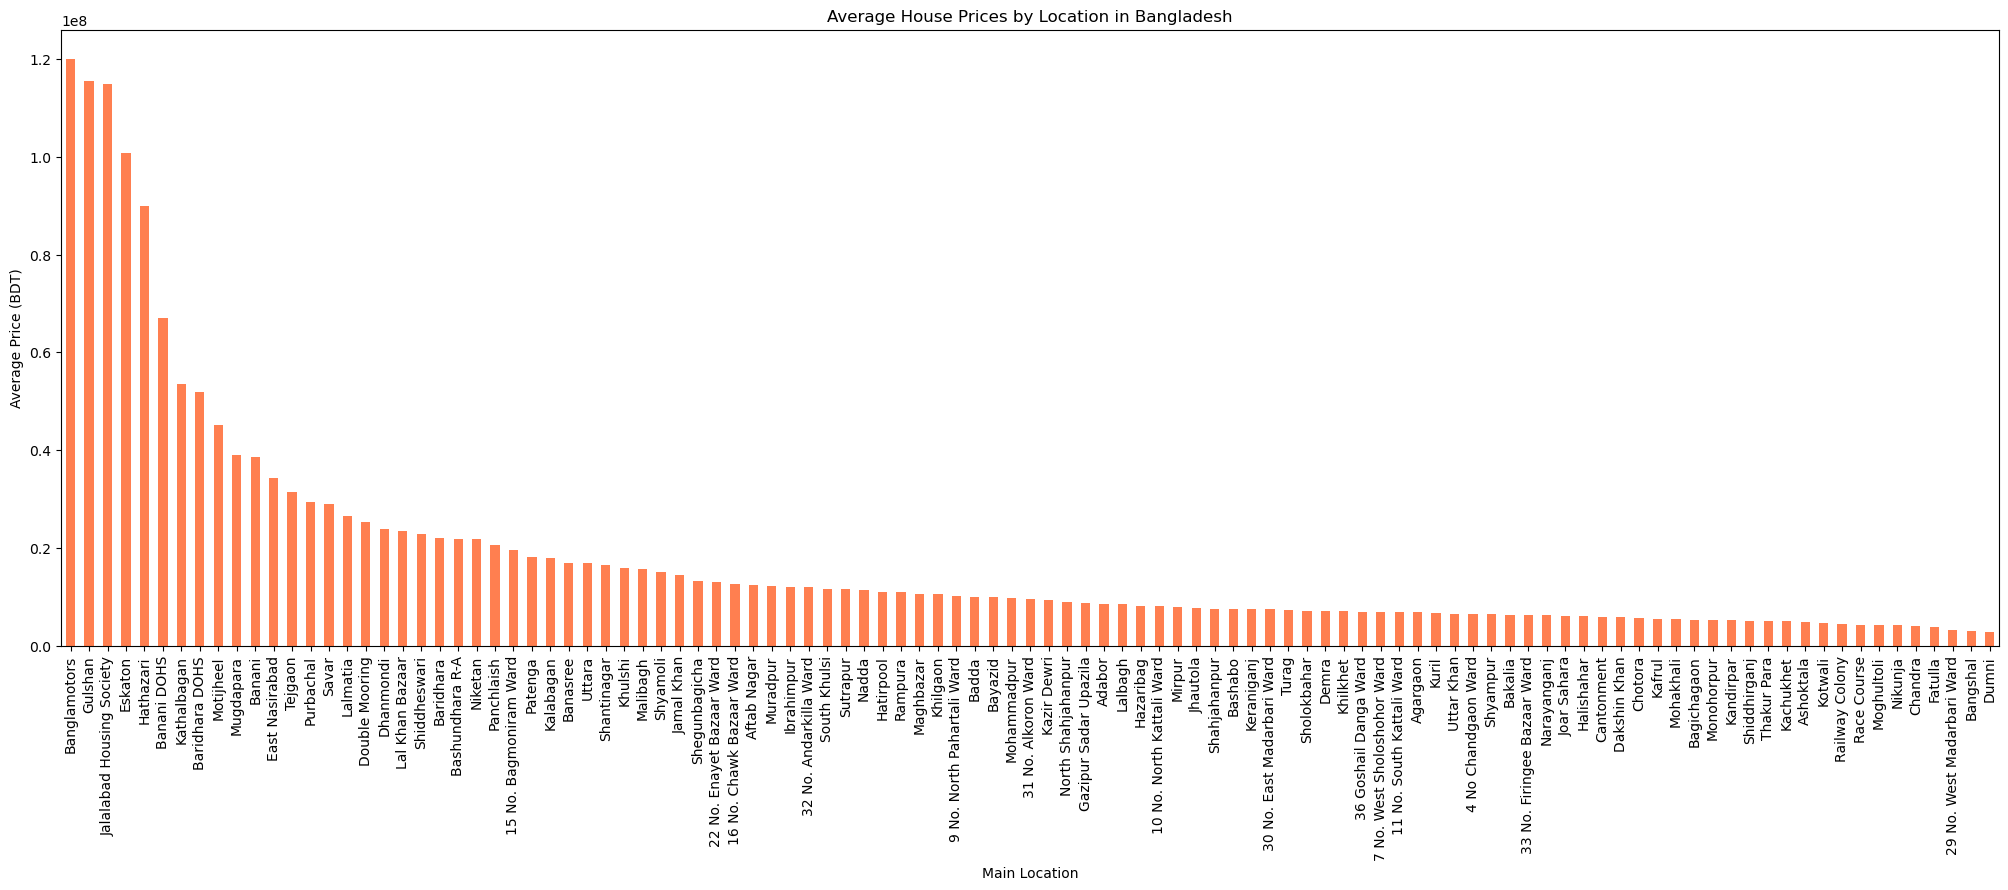

In [114]:
#Create 'Main_Location' by splitting the 'Location' column
df['Main_Location'] = df['Location'].str.split(", ").str[1]

#Verify that 'Main_Location' was created successfully
print(df.columns)
print(df[['Location', 'Main_Location']].head())

#Remove currency symbols and commas, then convert to numeric
df['Price_in_taka'] = df['Price_in_taka'].replace({'৳': '', ',': ''}, regex=True)

# Convert the column to numeric, forcing errors to NaN
df['Price_in_taka'] = pd.to_numeric(df['Price_in_taka'], errors='coerce')

# Now you can safely calculate the mean by main location
location_prices = df.groupby('Main_Location')['Price_in_taka'].mean().sort_values(ascending=False)

print("Average property prices by main location:")
print(location_prices)

# Visualize the average prices by main location
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 8))
location_prices.plot(kind='bar', color='coral')
plt.title('Average House Prices by Location in Bangladesh')
plt.xlabel('Main Location')
plt.ylabel('Average Price (BDT)')
plt.show()



In [ ]:
Comment: 
This analysis shows the average prices across different locations in Bangladesh.
Locations with higher prices likely correspond to urban or more desirable areas, while lower prices are seen in rural or less developed regions. This insight can help buyers and
investors understand the regional pricing landscape.


In two to three sentences (include them in your Colab notebook) highlight your biggest take away from the video.

Maximizing revenue requires understanding which marketing channels contribute the most.Businesses can identify key data to influence their objective functions(maximize, minimize & optimize) effectively.
AI agents are revolutionizing marketing and analytics, providing opportunities for hyper-personalization and self-service functionalities that enhance user experiences. This shift allows businesses to meet evolving customer expectations effectively.